<a href="https://colab.research.google.com/github/ashioyajotham/DSN/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = 'https://drive.google.com/file/d/1BNrbPshNvrNHiTe1o-Cp1gpJKY-chv5Z/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [2]:
#Mapping the values 1 and 0 to transform the target column
titanic["Sex"] = titanic[ "Sex"].apply(lambda x:1 if x == "male" else 0)

#Reading the data again
titanic.head (10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
5,0,3,1,54.0,0,0,8.4583,Q
6,0,1,1,54.0,0,0,51.8625,S
7,0,3,1,2.0,3,1,21.0750,S
8,1,3,0,27.0,0,2,11.1333,S
9,1,2,0,14.0,1,0,30.0708,C


In [3]:
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data

In [4]:
X = titanic.drop(["Sex"], axis= "columns") # droping the label variable 
y = titanic["Sex"]

In [5]:
X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [6]:
X = pd.get_dummies(X)
X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [8]:
import warnings
from sklearn.linear_model import LogisticRegression


logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [9]:
prediction = logisticmodel.predict(X_test)

In [10]:
metrics.accuracy_score(y_test, prediction)

0.7835820895522388

In [11]:
import matplotlib.pyplot as plt

def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

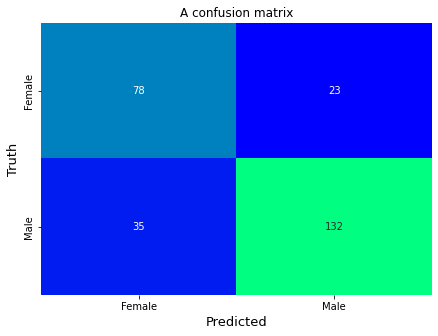

In [12]:
ConfusionMatrix(y_test, prediction, label= ["Female", "Male"])

Interpretation of the Logistics Regression model evaluation performance

There are 78 True Positives (TP): predicting 78 females who really survived
There are 132 True Negatives (TN): predicting true males who did not survive
There are 35 False Negative (FN): 
We can check the accuracy by using:

In [13]:
metrics.accuracy_score(y_test, prediction)

0.7835820895522388

In [14]:
# Name:  Victor Ashioua
# AI+ ID:  DSN/AIPlus/2020/15714

from sklearn.metrics import f1_score
print(f1_score(y_test, prediction))


0.8198757763975155
